[21.7  11.63  9.84  8.58  5.65  4.69  4.34  3.92  3.26  2.85  2.43  2.25
  2.06  2.02  1.71  1.64  1.42  1.24  1.04  0.94  0.91  0.76  0.62]


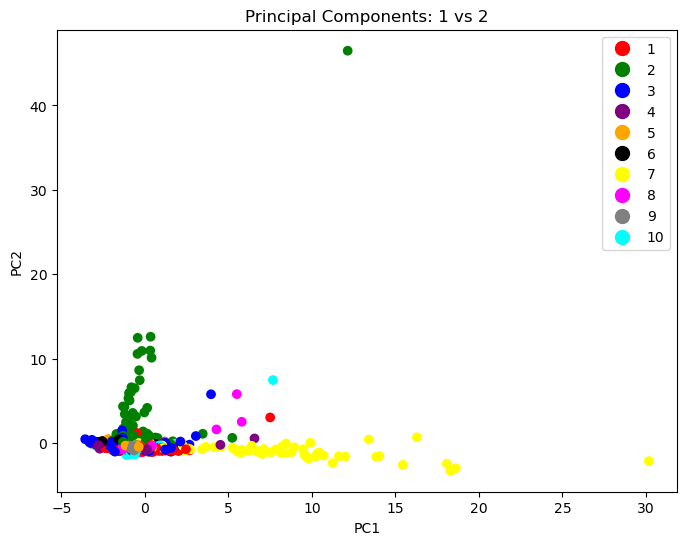

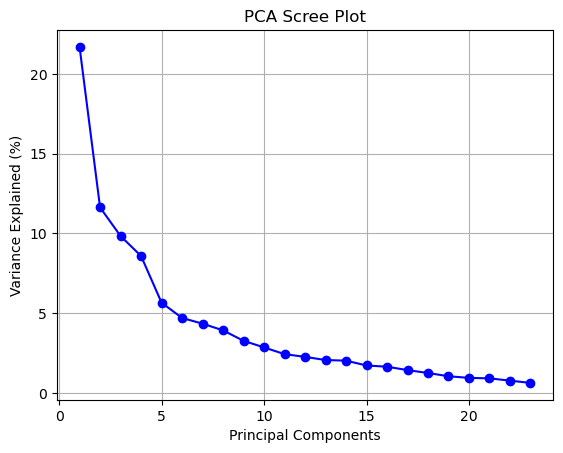

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import random
from matplotlib import cm
from sklearn import metrics
from sklearn import decomposition
from sklearn import discriminant_analysis
from scipy import stats
import matplotlib.lines as mlines


## Problem 2 ##

# Part A #
# read in data #
x_train = pd.read_csv('x1.csv', header = None)
x_val = pd.read_csv('x2.csv', header = None)
x_test = pd.read_csv('x3.csv', header = None)
y_train = pd.read_csv('c1.csv', header = None)
y_val = pd.read_csv('c2.csv', header = None)

x_train_arr = x_train.to_numpy()
x_val_arr = x_val.to_numpy()
x_test_arr = x_test.to_numpy()
y_train_arr = y_train.to_numpy()
y_val_arr = y_val.to_numpy()

# perform PCA #
pca = decomposition.PCA(n_components = 0.95)
pca_result = pca.fit_transform(x_train_arr)
ratios = pca.explained_variance_ratio_ * 100
np.set_printoptions(precision = 2, suppress = True)
print(ratios)

colors = {1:'red',2:'green',3:'blue',4:'purple',5:'orange',6:'black',7:'yellow',8:'magenta',9:'gray',10:'cyan'}
res = y_train_arr.reshape(-1)
color_map = [colors[label] for label in res]

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_map)
markers = [mlines.Line2D([0],[0],color=color, marker='o', linestyle='None', markersize=10) for color in colors.values()]
plt.legend(markers, colors.keys())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Components: 1 vs 2')
plt.savefig("./images/QA-PCplot")
plt.show()

# Part B #
pcs = np.arange(pca.n_components_) + 1
plt.figure()
plt.plot(pcs, ratios,'o-', color='blue')
plt.grid()
plt.title('PCA Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.savefig("./images/QA-Scree")
plt.show()


[66.73 11.87  6.66  4.32  3.41  2.53  1.93  1.69  0.87]


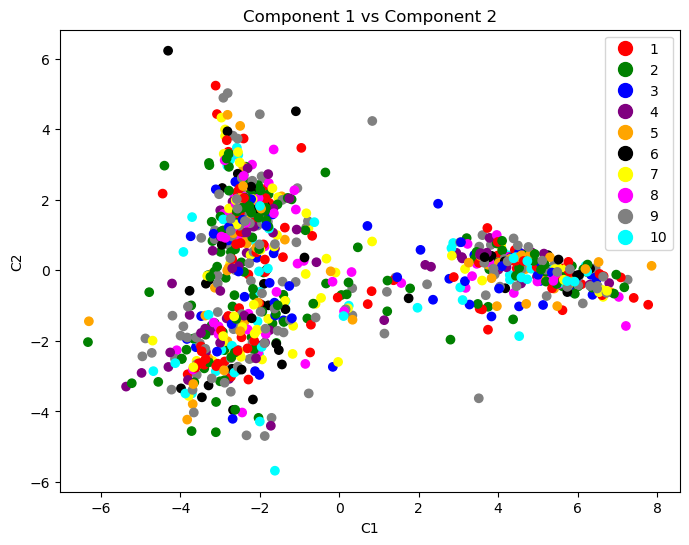

Accuracy:  0.7928730512249443


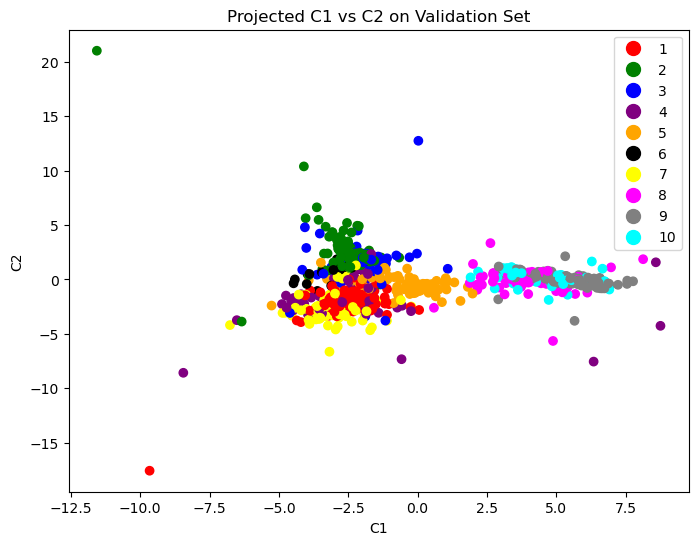

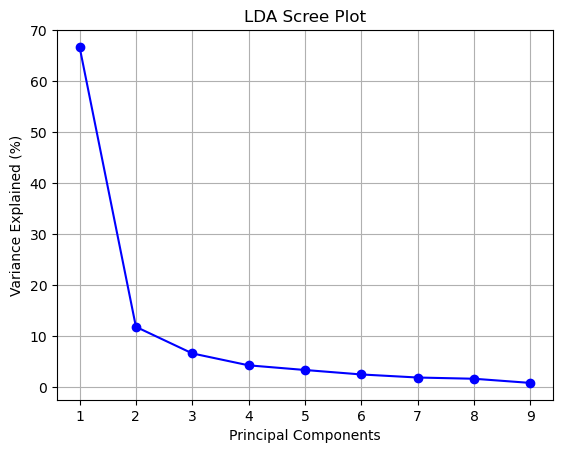

In [5]:
# perform LDA on Training set#
lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=9)
lda_result = lda.fit_transform(x_train_arr, res)
ratios = lda.explained_variance_ratio_ * 100
print(ratios)

plt.figure(figsize=(8, 6))
plt.scatter(lda_result[:, 0], lda_result[:, 1], c=color_map)
markers = [mlines.Line2D([0],[0],color=color, marker='o', linestyle='None', markersize=10) for color in colors.values()]
plt.legend(markers, colors.keys())
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Component 1 vs Component 2')
plt.savefig("./images/QB-LDA_train")
plt.show()

## Apply to validation set ## 
pred = lda.transform(x_val_arr)
print("Accuracy: ", lda.score(x_val_arr, y_val_arr))
color_map = [colors[label] for label in y_val_arr.reshape(-1)]

plt.figure(figsize=(8, 6))
plt.scatter(pred[:, 0], pred[:, 1], c=color_map)
markers = [mlines.Line2D([0],[0],color=color, marker='o', linestyle='None', markersize=10) for color in colors.values()]
plt.legend(markers, colors.keys())
plt.xlabel('C1')
plt.ylabel('C2')
plt.title('Projected C1 vs C2 on Validation Set')
plt.savefig("./images/QB-LDA_val")
plt.show()

# Part B #
plt.plot(range(1, 10), ratios, 'o-', color='blue')
plt.title('LDA Scree Plot')
plt.grid()
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained (%)')
plt.savefig("./images/QB-LDA_scree")
plt.show()